In [1]:
import sys
!{sys.executable} -m pip install nltk --quiet
!{sys.executable} -m pip install wordcloud --quiet
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('MENTAL HEALTH.csv')
print(df.head())

C:\Users\91938\AppData\Local\Temp\ipykernel_11380\3527673268.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MENTAL HEALTH.csv')


                                               Title  \
0                            exposure does not work!   
1  Panic attack? derealization? can't go to docto...   
2                 How long can a panic attack last?!   
3                                    Stepping stones   
4  Coping with anxiety over climate change, on th...   

                                                Text Subreddit Unnamed: 3  \
0  I have struggled with social anxiety from chil...   Anxiety        NaN   
1  Back in March (I know, a while ago D:), I woke...   Anxiety        NaN   
2  I've been withdrawing from medicines lately (e...   Anxiety        NaN   
3  First time poster, long time lurker. \n\nI've ...   Anxiety        NaN   
4  Hi all,\n\nI made a throwaway account as my ma...   Anxiety        NaN   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   
1        NaN        NaN        NaN        NaN   

In [3]:
print(df.columns)

Index(['Title', 'Text', 'Subreddit', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'U

In [4]:
print("SHAPE BEFORE CLEANING: ", df.shape)

SHAPE BEFORE CLEANING:  (488738, 79)


In [5]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

print(df.head())

                                               Title  \
0                            exposure does not work!   
1  Panic attack? derealization? can't go to docto...   
2                 How long can a panic attack last?!   
3                                    Stepping stones   
4  Coping with anxiety over climate change, on th...   

                                                Text Subreddit  
0  I have struggled with social anxiety from chil...   Anxiety  
1  Back in March (I know, a while ago D:), I woke...   Anxiety  
2  I've been withdrawing from medicines lately (e...   Anxiety  
3  First time poster, long time lurker. \n\nI've ...   Anxiety  
4  Hi all,\n\nI made a throwaway account as my ma...   Anxiety  


In [6]:
print(df.columns)

Index(['Title', 'Text', 'Subreddit'], dtype='object')


In [7]:
print("SHAPE AFTER CLEANING: ", df.shape)

SHAPE AFTER CLEANING:  (488738, 3)


In [8]:
df['Combined'] = df['Title'].fillna('') + ' ' + df['Text'].fillna('')

In [9]:
df.head

<bound method NDFrame.head of                                                     Title  \
0                                 exposure does not work!   
1       Panic attack? derealization? can't go to docto...   
2                      How long can a panic attack last?!   
3                                         Stepping stones   
4       Coping with anxiety over climate change, on th...   
...                                                   ...   
488733                 Religion and paranoid conversation   
488734  Isn't this a little weird for being tardive dy...   
488735  Is this a symptom of schizophrenia or somethin...   
488736  Anyone seen the new Black Mirror episode Bande...   
488737   My girlfriend of over 1 year and I just broke up   

                                                     Text      Subreddit  \
0       I have struggled with social anxiety from chil...        Anxiety   
1       Back in March (I know, a while ago D:), I woke...        Anxiety   
2       I

In [10]:
df['Combined'] = df['Combined'].str.lower()
df.head

<bound method NDFrame.head of                                                     Title  \
0                                 exposure does not work!   
1       Panic attack? derealization? can't go to docto...   
2                      How long can a panic attack last?!   
3                                         Stepping stones   
4       Coping with anxiety over climate change, on th...   
...                                                   ...   
488733                 Religion and paranoid conversation   
488734  Isn't this a little weird for being tardive dy...   
488735  Is this a symptom of schizophrenia or somethin...   
488736  Anyone seen the new Black Mirror episode Bande...   
488737   My girlfriend of over 1 year and I just broke up   

                                                     Text      Subreddit  \
0       I have struggled with social anxiety from chil...        Anxiety   
1       Back in March (I know, a while ago D:), I woke...        Anxiety   
2       I

In [11]:
df['Combined'] = df['Combined'].str.replace(r'[^a-z\s]', '', regex=True)
df.head

<bound method NDFrame.head of                                                     Title  \
0                                 exposure does not work!   
1       Panic attack? derealization? can't go to docto...   
2                      How long can a panic attack last?!   
3                                         Stepping stones   
4       Coping with anxiety over climate change, on th...   
...                                                   ...   
488733                 Religion and paranoid conversation   
488734  Isn't this a little weird for being tardive dy...   
488735  Is this a symptom of schizophrenia or somethin...   
488736  Anyone seen the new Black Mirror episode Bande...   
488737   My girlfriend of over 1 year and I just broke up   

                                                     Text      Subreddit  \
0       I have struggled with social anxiety from chil...        Anxiety   
1       Back in March (I know, a while ago D:), I woke...        Anxiety   
2       I

In [12]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['Combined'] = df['Combined'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

df['Combined'] = df['Combined'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
df = df[df['Combined'].str.len() > 10]  # adjust threshold as needed

In [15]:
df.isnull().values.any()
df.isnull().sum().sum()
df.isnull().sum()

Title         5
Text         21
Subreddit    59
Combined      0
dtype: int64

In [16]:
df[df.isnull().any(axis=1)]

,Title,Text,Subreddit,Combined
51758,"I Popped My Psych-Ward Cherry, Part II (Length...","Original Post \(possibly required reading, bu...",NaN,popped psychward cherry part ii lengthy amp vu...
51775,I’m maybe a society 6 but apparently a psych\-...,NaN,NaN,im maybe society apparently psychward
51777,"To Possibly Be Continued…""",Anxiety,NaN,possibly continued anxiety
88313,I am not asking for diagnosis.Just want to get...,Note: If you found your comments here is becau...,NaN,asking diagnosisjust want get rid doubt misdia...
88321,Things I read on this subreddit and i relate to:,NaN,NaN,thing read subreddit relate
...,...,...,...,...
480617,Title: Keratitis caused by a rare fungus,Malassezia restricta \(NCBI; US National Libr...,NaN,title keratitis caused rare fungus malassezia ...
480621,Title: Identification of Fungal Species in Bra...,NaN,NaN,title identification fungal specie brain tissu...
480625,§ “About 36 per cent of people with Alzheimer'...,study suggests; ScienceDaily; 2017\).,NaN,per cent people alzheimers thought delusion pe...
480627,Title: Schizophrenia as a prostaglandin defici...,NaN,NaN,title schizophrenia prostaglandin deficiency d...


In [17]:
df.dropna(subset=['Title', 'Text', 'Subreddit', 'Combined'], inplace=True)

C:\Users\91938\AppData\Local\Temp\ipykernel_11380\724578079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Title', 'Text', 'Subreddit', 'Combined'], inplace=True)


In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
df['Text'] = df['Text'].str.replace('\n', ' ', regex=True)
df['Title'] = df['Title'].str.replace('\n', ' ', regex=True)
df['Combined'] = df['Combined'].str.replace('\n', ' ', regex=True)

C:\Users\91938\AppData\Local\Temp\ipykernel_11380\3396328298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].str.replace('\n', ' ', regex=True)
C:\Users\91938\AppData\Local\Temp\ipykernel_11380\3396328298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].str.replace('\n', ' ', regex=True)
C:\Users\91938\AppData\Local\Temp\ipykernel_11380\3396328298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [20]:
df.isnull().values.any()
df.isnull().sum().sum()
df.isnull().sum()

Title        0
Text         0
Subreddit    0
Combined     0
dtype: int64

In [21]:
from IPython.display import display
display(df)


,Title,Text,Subreddit,Combined
0,exposure does not work!,I have struggled with social anxiety from chil...,Anxiety,exposure work struggled social anxiety childho...
1,Panic attack? derealization? can't go to docto...,"Back in March (I know, a while ago D:), I woke...",Anxiety,panic attack derealization cant go doctor advi...
2,How long can a panic attack last?!,I've been withdrawing from medicines lately (e...,Anxiety,long panic attack last ive withdrawing medicin...
3,Stepping stones,"First time poster, long time lurker. I've ha...",Anxiety,stepping stone first time poster long time lur...
4,"Coping with anxiety over climate change, on th...","Hi all, I made a throwaway account as my main...",Anxiety,coping anxiety climate change verge considerin...
...,...,...,...,...
488365,Religion and paranoid conversation,Ok! I've got a rant to make and a conversation...,schizophrenia,religion paranoid conversation ok ive got rant...
488366,Isn't this a little weird for being tardive dy...,"When I wake up, I rarely have any tics in my t...",schizophrenia,isnt little weird tardive dyskinesia wake rare...
488367,Is this a symptom of schizophrenia or somethin...,I’m not sure if this is schizophrenia (or perh...,schizophrenia,symptom schizophrenia something else im sure s...
488368,Anyone seen the new Black Mirror episode Bande...,Although I don't think it was stated what Stef...,schizophrenia,anyone seen new black mirror episode bandersna...


C:\Users\91938\AppData\Local\Temp\ipykernel_11380\2076999871.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


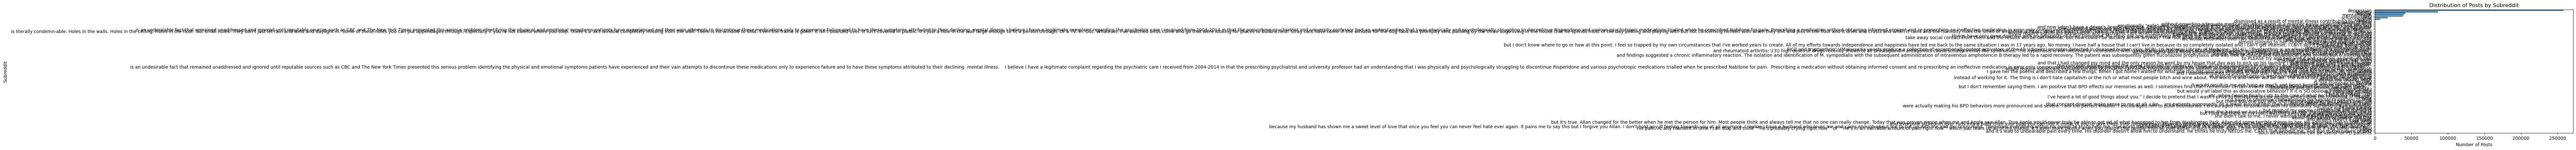

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Subreddit', data=df, order=df['Subreddit'].value_counts().index)
plt.title('Distribution of Posts by Subreddit')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()

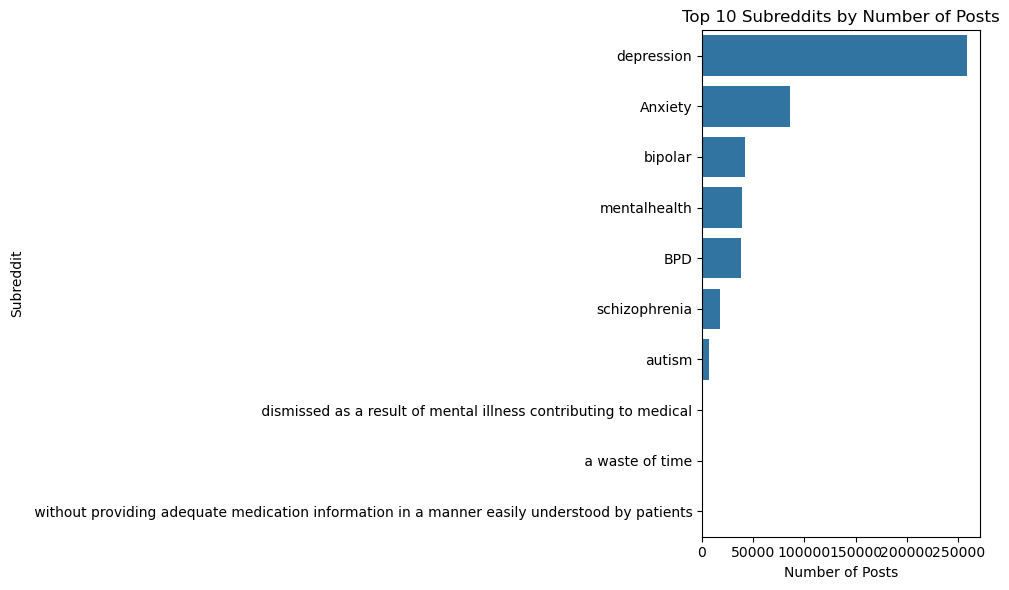

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 subreddits by frequency
top_subreddits = df['Subreddit'].value_counts().nlargest(10).index

# Filter DataFrame
filtered_df = df[df['Subreddit'].isin(top_subreddits)]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(y='Subreddit', data=filtered_df, order=top_subreddits)
plt.title('Top 10 Subreddits by Number of Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()


In [24]:
# Define the valid subreddits you want to keep
valid_subreddits = ['depression', 'Anxiety', 'bipolar', 'mentalhealth', 'BPD', 'schizophrenia', 'autism']

# Replace all other subreddit values with NaN
df['Subreddit'] = df['Subreddit'].where(df['Subreddit'].isin(valid_subreddits))

# Drop rows where 'subreddit' is NaN (i.e., invalid or unwanted subreddits)
df.dropna(subset=['Subreddit'], inplace=True)
df.isnull().values.any()

C:\Users\91938\AppData\Local\Temp\ipykernel_11380\901992291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subreddit'] = df['Subreddit'].where(df['Subreddit'].isin(valid_subreddits))
C:\Users\91938\AppData\Local\Temp\ipykernel_11380\901992291.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Subreddit'], inplace=True)


False

In [25]:
df.reset_index(drop=True, inplace=True)
df.shape

(488290, 4)

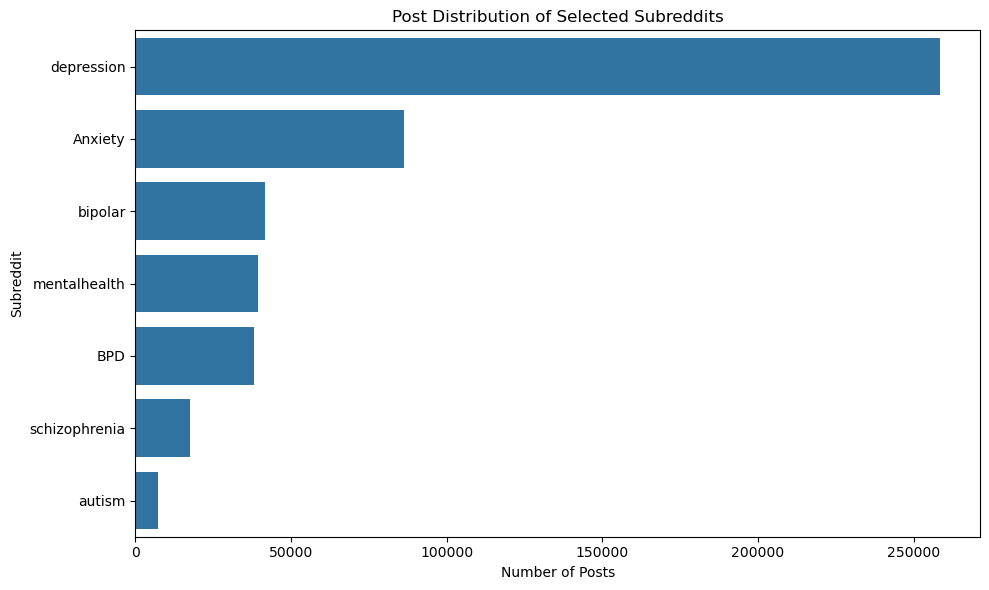

In [26]:
# Define the valid subreddits you want to keep
valid_subreddits = ['depression', 'Anxiety', 'bipolar', 'mentalhealth', 'BPD', 'schizophrenia', 'autism']

# Keep only rows where 'Subreddit' is in the valid list
filtered_df = df[df['Subreddit'].isin(valid_subreddits)].copy()

# Plot distribution of the selected subreddits
plt.figure(figsize=(10, 6))
sns.countplot(y='Subreddit', data=filtered_df, order=filtered_df['Subreddit'].value_counts().index)
plt.title('Post Distribution of Selected Subreddits')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [28]:
def simple_clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

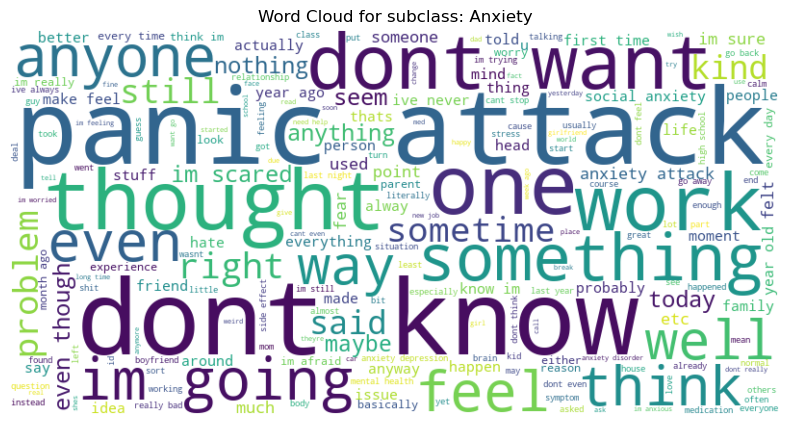

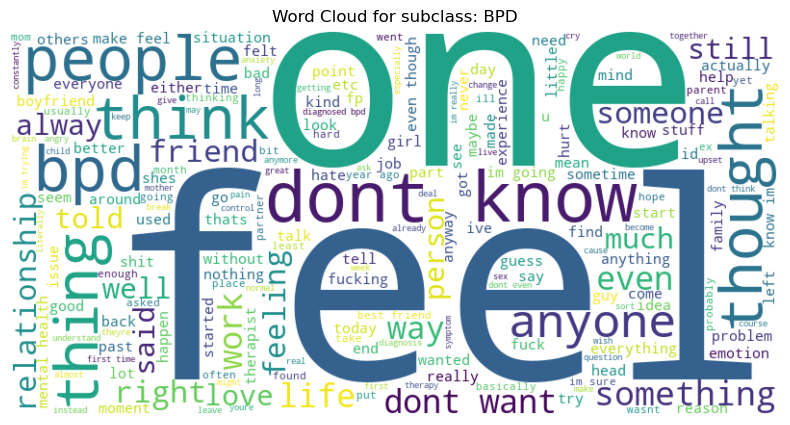

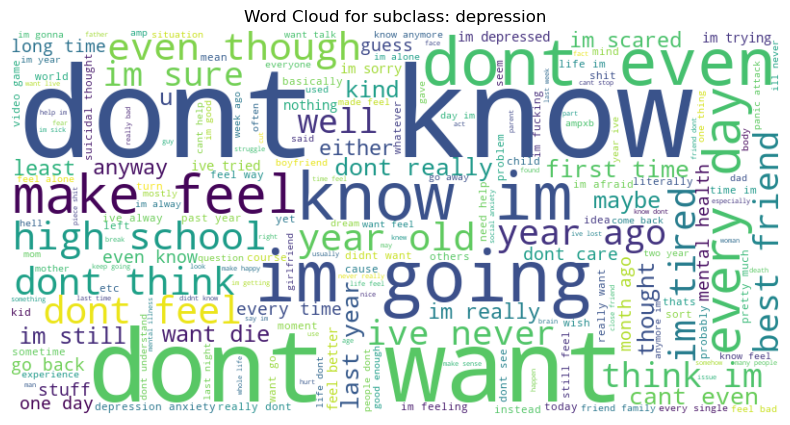

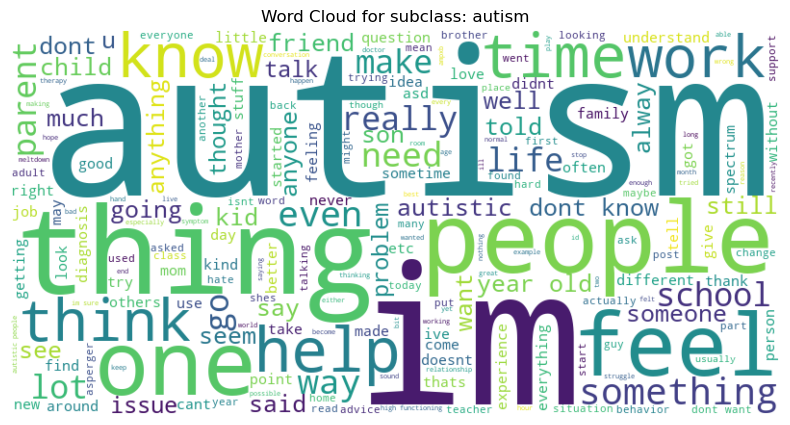

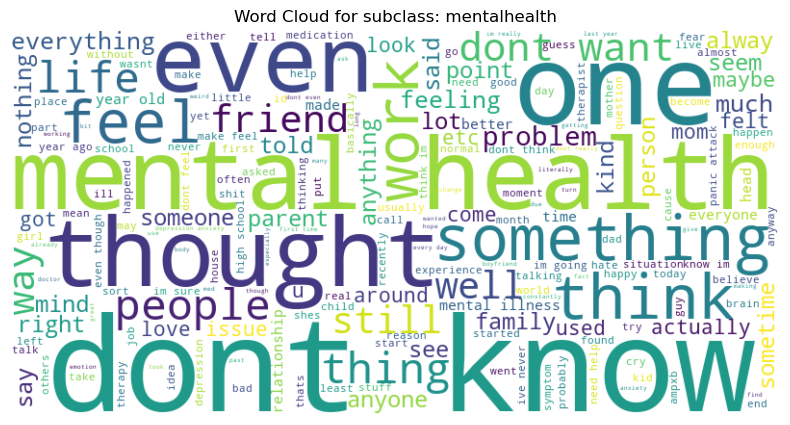

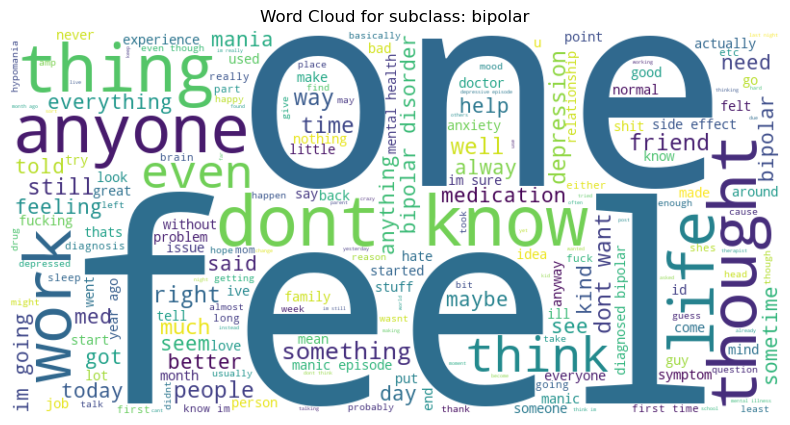

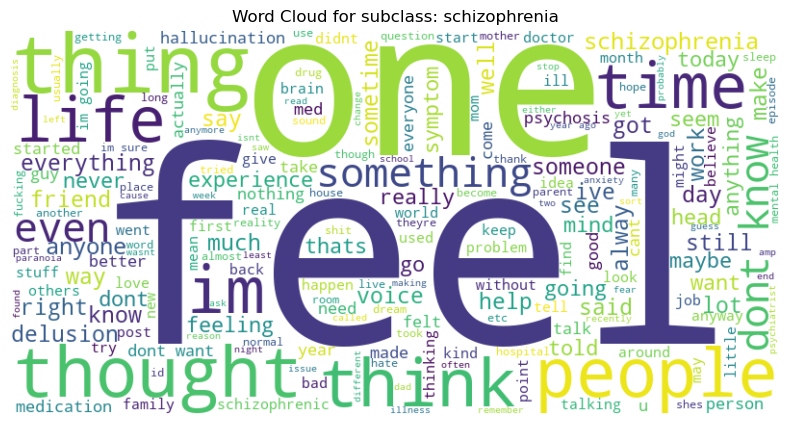

In [29]:
for sub in df['Subreddit'].unique():
    text = ' '.join(df[df['Subreddit'] == sub]['Combined'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for subclass: {sub}')
    plt.show()

In [30]:
import numpy as np

top_words_per_class = defaultdict(list)
vectorizer = CountVectorizer(max_features=1000)
for sub in df['Subreddit'].unique():
    texts = df[df['Subreddit'] == sub]['Combined']
    X = vectorizer.fit_transform(texts)
    word_freq = np.asarray(X.sum(axis=0)).flatten()
    vocab = vectorizer.get_feature_names_out()
    freq_dict = dict(zip(vocab, word_freq))
    sorted_words = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    top_words_per_class[sub] = sorted_words


In [31]:
top_words_per_class_df = pd.DataFrame({k: dict(v) for k, v in top_words_per_class.items()})
display(top_words_per_class_df)

,Anxiety,BPD,depression,autism,mentalhealth,bipolar,schizophrenia
im,175984.0,77657.0,572321.0,8736.0,91399.0,76890.0,25541.0
anxiety,134971.0,NaN,NaN,NaN,NaN,NaN,NaN
like,108884.0,55336.0,357849.0,6944.0,64663.0,42270.0,17842.0
feel,95581.0,48372.0,347381.0,NaN,55272.0,34966.0,11124.0
get,76372.0,28694.0,215583.0,4726.0,39487.0,26855.0,9677.0
dont,74699.0,39915.0,348088.0,4837.0,53528.0,30728.0,12483.0
ive,70119.0,27623.0,208386.0,NaN,37206.0,30047.0,8927.0
time,65522.0,29001.0,203922.0,3930.0,38434.0,26461.0,9591.0
know,65359.0,35717.0,236562.0,4814.0,43139.0,26539.0,11030.0
really,54580.0,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\91938\AppData\Local\Temp\ipykernel_11380\3994889048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['Combined'].str.split().apply(len)


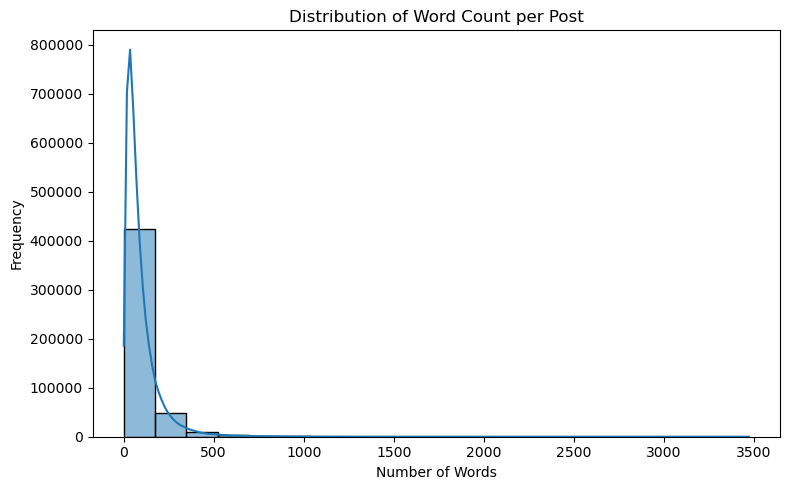

In [32]:
df['word_count'] = df['Combined'].str.split().apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(df['word_count'], bins=20, kde=True)
plt.title('Distribution of Word Count per Post')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

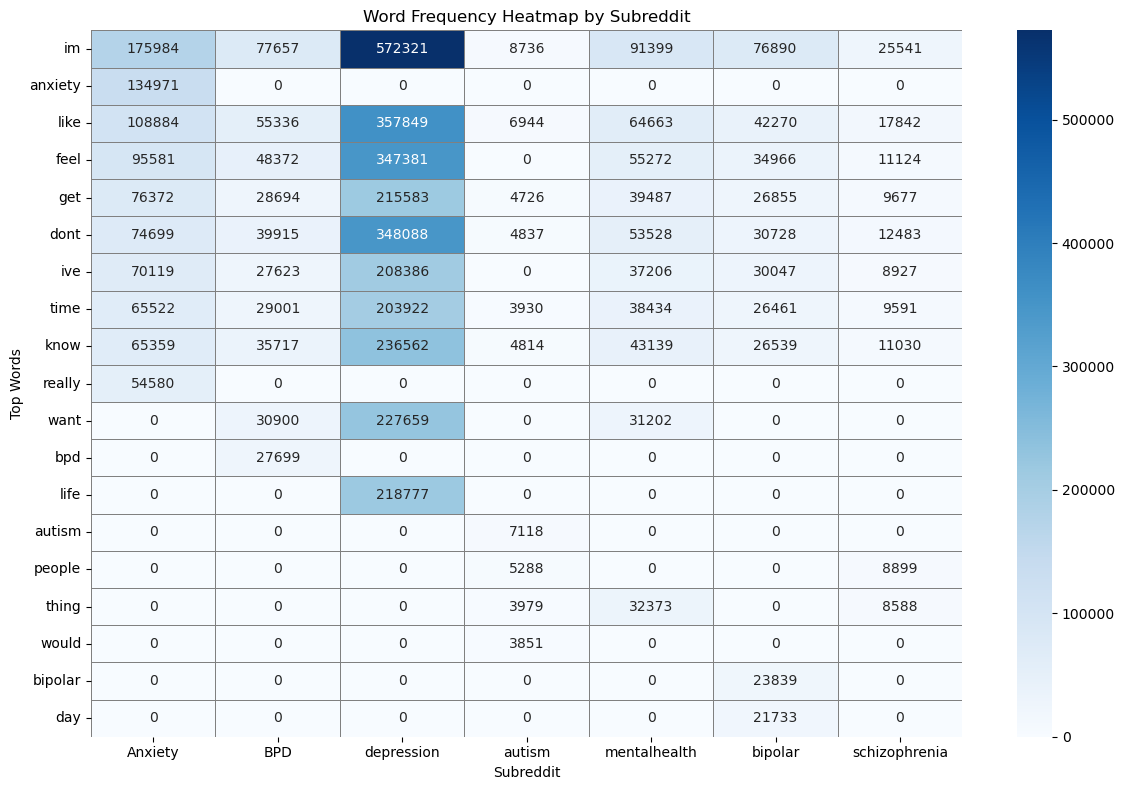

In [33]:
heatmap_df = top_words_per_class_df.fillna(0)

# Set figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(heatmap_df, 
            annot=True,      # show numbers
            fmt=".0f",       # integer format
            cmap='Blues',    # color scheme
            linewidths=0.5, 
            linecolor='gray')

# Add labels and title
plt.title("Word Frequency Heatmap by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Top Words")
plt.tight_layout()
plt.show()
